# Model Calibration

## Imports and Setup

In [ ]:
import os 
os.chdir('/home/itingzon.unicef/giga')
from utils import config_utils
from utils import calib_utils
from utils import post_utils
from utils import eval_utils
from utils import model_utils

import pandas as pd
import numpy as np
import geopandas as gpd

pd.set_option('mode.chained_assignment', None)
%load_ext autoreload
%autoreload 2

## Load Configuration

In [340]:
iso_code = "SEN"
config_file = os.path.join(os.getcwd(), "configs/best_models.yaml")
config = config_utils.load_config(config_file)

## Model Calibration

In [341]:
results = calib_utils.compare_calibrators(iso_code, config, n_bins=15)
results = pd.DataFrame(results).T.apply(lambda x: round(x, 5))
results

,val_ace,val_ece,val_mce,val_nll,val_briers,val_auprc,test_ace,test_ece,test_mce,test_nll,test_briers,test_auprc
Uncalibrated (baseline),0.13437,0.07654,0.28807,0.11495,0.02221,0.99684,0.16813,0.08413,0.35890,0.12129,0.02276,0.99282
IsotonicRegression,0.00000,0.00000,0.00000,0.04008,0.01173,0.99662,0.25141,0.00702,0.77200,0.11205,0.01214,0.99055
TemperatureScaling,0.19640,0.01043,0.56360,0.05031,0.01335,0.99684,0.24999,0.01114,0.76582,0.05545,0.01189,0.99282
LogisticCalibration,0.13036,0.01017,0.56534,0.05017,0.01339,0.99684,0.20657,0.00965,0.73879,0.05420,0.01168,0.99282
BetaCalibration,0.16153,0.01009,0.58511,0.05005,0.01335,0.99684,0.27156,0.01113,0.74634,0.05357,0.01173,0.99282


In [ ]:
results.iloc[0] - results

## Load Model Calibrator

In [346]:
calibrator_name = "IsotonicRegression"
calibrator = calib_utils.load_calibrator(iso_code, config, calibrator_name)
calibrator

IsotonicRegression(_default_independent_probabilities=False,
                   _iso=IsotonicRegression(out_of_bounds='clip', y_max=1.0,
                                           y_min=0.0),
                   _multiclass_instances=[], num_classes=2)

## Plot Results

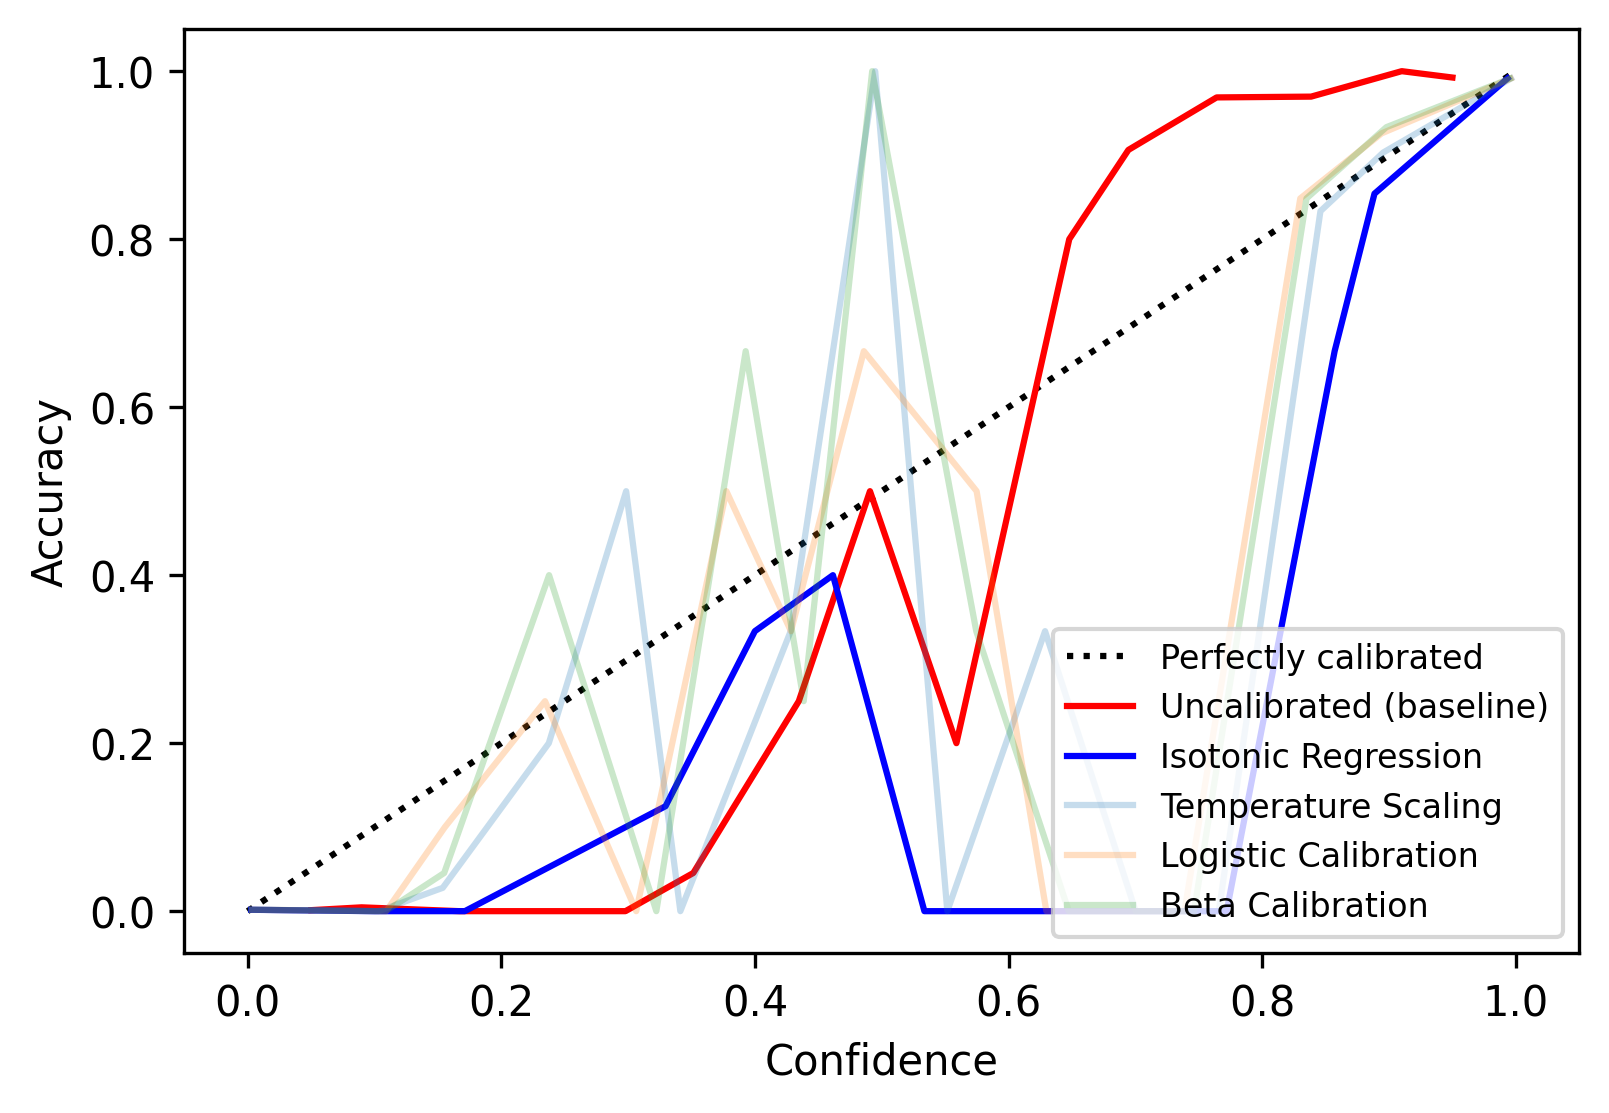

In [347]:
calib_utils.calibration_curves(iso_code, config, highlight=calibrator_name, n_bins=15)

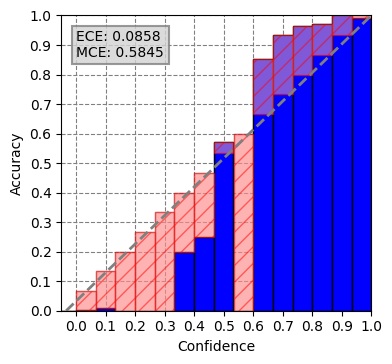

In [348]:
output = calib_utils.get_calibrator_outputs(iso_code, config, calibrator_name, phase="test")
calib_utils.reliability_diagram(output["y_probs"], output["y_true"], n_bins=15)

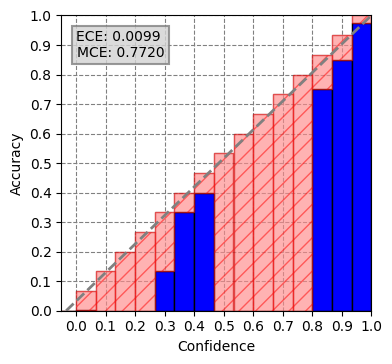

In [349]:
calib_utils.reliability_diagram(output["y_probs_cal"], output["y_true"], n_bins=15)